EDA
---

In [16]:
#import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

plt.style.use('dark_background')

In [17]:
#import data
data_path = '../data/'
train_data_filename = 'Training_DataSet.csv'
test_data_filename = 'Test_Dataset.csv'

traindf = pd.read_csv(data_path + train_data_filename)
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerCity            6298 non-null   object 
 2   SellerIsPriv          6298 non-null   bool   
 3   SellerListSrc         6296 non-null   object 
 4   SellerName            6298 non-null   object 
 5   SellerRating          6298 non-null   float64
 6   SellerRevCnt          6298 non-null   int64  
 7   SellerState           6298 non-null   object 
 8   SellerZip             6296 non-null   float64
 9   VehBodystyle          6298 non-null   object 
 10  VehCertified          6298 non-null   bool   
 11  VehColorExt           6225 non-null   object 
 12  VehColorInt           5570 non-null   object 
 13  VehDriveTrain         5897 non-null   object 
 14  VehEngine             5937 non-null   object 
 15  VehFeats             

In [18]:
#look at basic statistics of numeric data
traindf.describe()

,ListingID,SellerRating,SellerRevCnt,SellerZip,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
count,6.298000e+03,6298.000000,6298.000000,6296.000000,6296.000000,6296.000000,6298.000000,6246.000000
mean,4.318130e+06,4.138346,434.565576,45234.211722,56.143670,26369.364358,2016.792633,32265.053314
std,2.486031e+06,1.188033,1274.257411,20380.478191,68.301329,13036.568712,1.206566,7538.339005
min,3.287000e+03,0.000000,0.000000,1105.000000,0.293102,0.000000,2015.000000,18289.000000
25%,2.178112e+06,4.000000,28.000000,28806.000000,12.998391,16835.000000,2015.000000,26900.000000
50%,4.298122e+06,4.600000,126.000000,46410.000000,33.463484,26181.000000,2017.000000,31455.500000
75%,6.488249e+06,4.800000,401.000000,60126.000000,74.139769,36468.500000,2018.000000,35991.000000
max,8.620012e+06,5.000000,14635.000000,99654.000000,820.684375,83037.000000,2019.000000,89500.000000


---
# Listing ID
---

<AxesSubplot:>

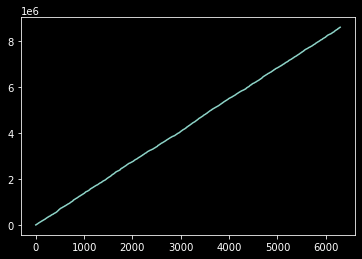

In [26]:
# 'ListingID' monotonically increases, approxmately linearly, with index.
testdf.ListingID.plot()

<AxesSubplot:>

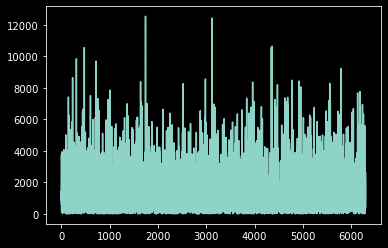

In [21]:
#Increase of subsequent IDs is always positive but variable.
testdf.ListingID.diff().plot()

<AxesSubplot:>

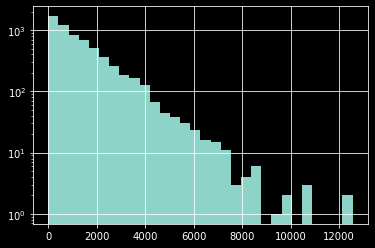

In [24]:
#The distribution of the increase is exponentially decaying with larger skips.
testdf.ListingID.diff().hist(bins = 30, log = True)

# SellerCity
These all appear to be USA cities. Top represented cities largely not from the west coast?

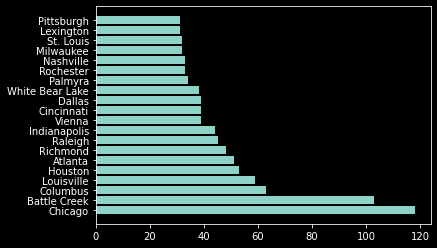

In [51]:
#plot number of instances of sales from the most represented cities
scvaluecounts = traindf.SellerCity.value_counts()[:20];
plt.barh(scvaluecounts.index, scvaluecounts);

In [53]:
#how many cities are represented?
len(traindf.SellerCity.unique())

1318

---
# SellerIsPriv

If private seller. (Is a dealership a non-private seller?)

In [62]:
#Only 14 of the listings are listed as private. This may cause overfitting.
priv

False    6284
True       14
Name: SellerIsPriv, dtype: int64

In [70]:
# What are typical prices of these?
privateprices = traindf.loc[traindf['SellerIsPriv'] == 1, 'Dealer_Listing_Price' ]
privateprices.describe()

count       14.000000
mean     30310.214286
std       6223.299065
min      18699.000000
25%      27112.500000
50%      30700.000000
75%      34375.000000
max      42000.000000
Name: Dealer_Listing_Price, dtype: float64

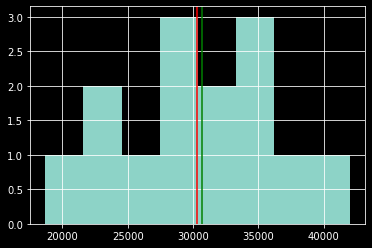

In [94]:
privateprices.hist(bins = 8)
plt.axvline(privateprices.mean(), color = 'red')
plt.axvline(privateprices.describe()['50%'], color = 'green')

In [95]:
#Compare this to the overall prices for the set later.

# SellerListSrc

In [98]:
#only a few different "seller listing source identifiers".
traindf.SellerListSrc.value_counts()

Digital Motorworks (DMi)       3086
Inventory Command Center       1189
HomeNet Automotive             1037
Jeep Certified Program          709
Cadillac Certified Program      229
My Dealer Center                 29
Sell It Yourself                 14
Five Star Certified Program       3
Name: SellerListSrc, dtype: int64

In [99]:
#two listings are NaN
# These also have SellerZip, VehSellerNotes, and VehTransmission as NaN.
traindf.loc[traindf['SellerListSrc'].isna()]

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
1125,1562581,Richmond,False,NaN,Pearson Chrysler Jeep Dodge RAM,1.0,4,VA,NaN,SUV,...,Jeep,38329.0,Grand Cherokee,Good Deal,NaN,Used,NaN,2017,Limited,26333.0
3855,5306897,Dearborn,False,NaN,Jack Demmer Lincoln,4.8,261,MI,NaN,SUV,...,Jeep,36678.0,Grand Cherokee,Fair Price,NaN,Used,NaN,2015,Limited,23500.0


---
# SellerName

In [104]:
#about 60% of the sellers only show once
len(traindf.SellerName.unique()), len(traindf.SellerName.unique())/len(traindf)

(2452, 0.3893299460146078)

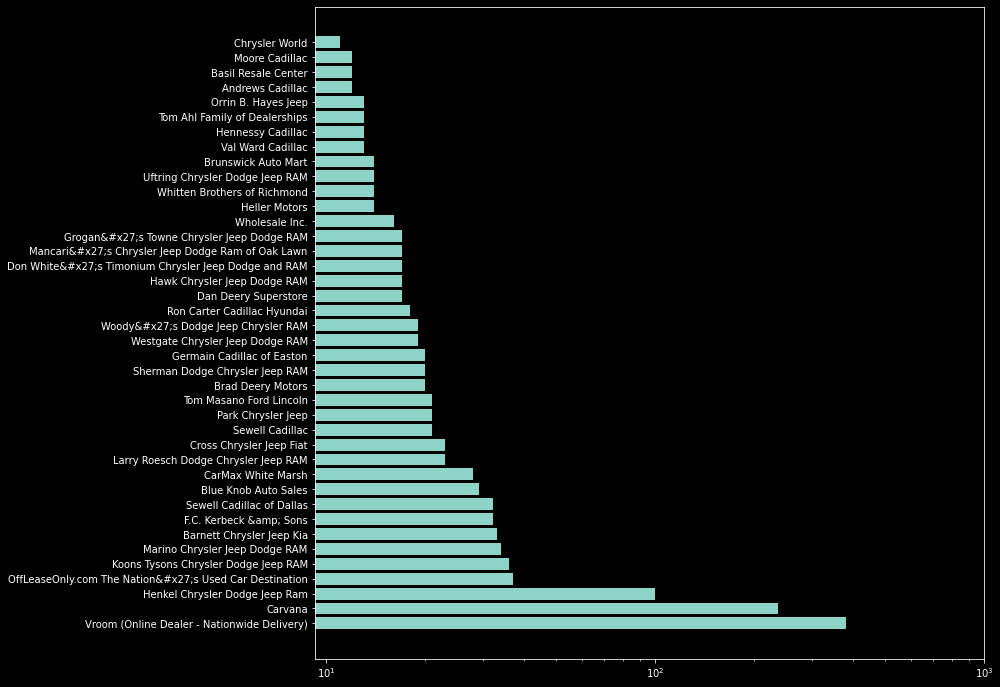

In [130]:
#Look at number of sales of instances from each seller type.
sellernamecounts = traindf.SellerName.value_counts()[:40]
plt.figure(figsize = (12,12))
plt.barh(sellernamecounts.index, sellernamecounts, log = True)
plt.xticks(np.logspace(1,3,3));

---
# SellerRating

In [131]:
traindf.SellerRating.describe()

count    6298.000000
mean        4.138346
std         1.188033
min         0.000000
25%         4.000000
50%         4.600000
75%         4.800000
max         5.000000
Name: SellerRating, dtype: float64

<AxesSubplot:>

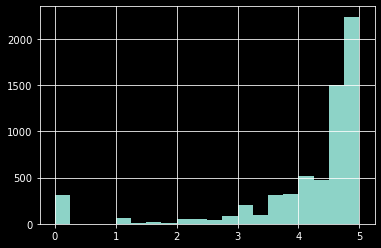

In [139]:
#look at rating distribution
traindf.SellerRating.hist(bins = 20)

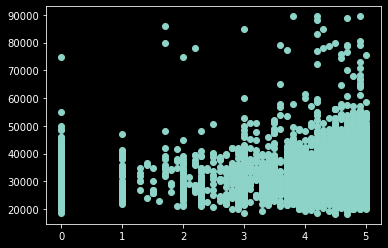

In [140]:
#Seller rating with avg sales price isn't directly correlated
plt.scatter(
    traindf.SellerRating,
    traindf['Dealer_Listing_Price']
)

---
# SellerRevCnt

<AxesSubplot:>

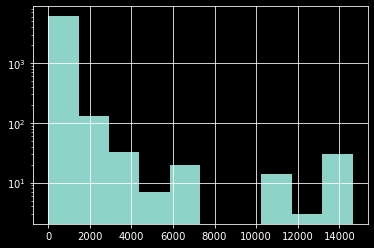

In [142]:
#look at distribution of review counts
traindf.SellerRevCnt.hist(log = True)

---

In [27]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerCity            6298 non-null   object 
 2   SellerIsPriv          6298 non-null   bool   
 3   SellerListSrc         6296 non-null   object 
 4   SellerName            6298 non-null   object 
 5   SellerRating          6298 non-null   float64
 6   SellerRevCnt          6298 non-null   int64  
 7   SellerState           6298 non-null   object 
 8   SellerZip             6296 non-null   float64
 9   VehBodystyle          6298 non-null   object 
 10  VehCertified          6298 non-null   bool   
 11  VehColorExt           6225 non-null   object 
 12  VehColorInt           5570 non-null   object 
 13  VehDriveTrain         5897 non-null   object 
 14  VehEngine             5937 non-null   object 
 15  VehFeats             

In [ ]:
a